In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [51]:
def show_img(img, title=""):
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis("off")
    plt.title(title)
    plt.show()

In [52]:
def sobel_edge_detection(img):
    img = cv2.GaussianBlur(
        src=img,
        ksize=(3,3),
        sigmaX=0
    )
    img = cv2.Sobel(
        src=img,
        ddepth=cv2.CV_64F,
        dx=1,
        dy=1,
        ksize=1
    )

    return img

def canny_edge_detection(img, threshold_1, threshold_2):
    img = cv2.GaussianBlur(
        src=img,
        ksize=(3,3),
        sigmaX=0
    )
    img = cv2.Canny(
        image=img,
        threshold1=threshold_1,
        threshold2=threshold_2
    )

    return img

def template_match(img, template):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    w, h = template_gray.shape[::-1]

    res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)
    threshold = 0.9
    locs = np.where(res >= threshold)
    for pt in zip(*locs[::-1]):
        cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,165,255), 1)
    
    return img

def resize(img, scale_factor: int, up_or_down: str):
    rows, cols, _ = img.shape
    if up_or_down == "up":
        img = cv2.pyrUp(img, dstsize=(scale_factor*cols, scale_factor*rows))
    elif up_or_down == "down":
        img = cv2.pyrDown(img, dstsize=(cols//scale_factor, rows//scale_factor))
    else:
        raise Exception()
    
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-138.0..174.0].


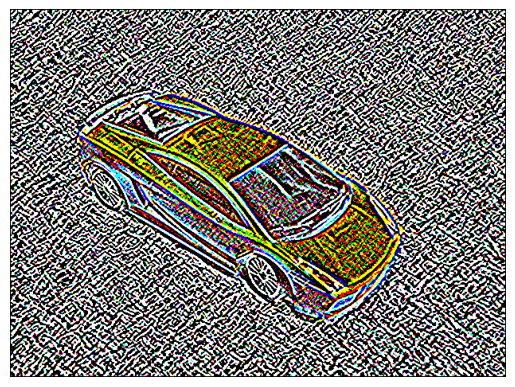

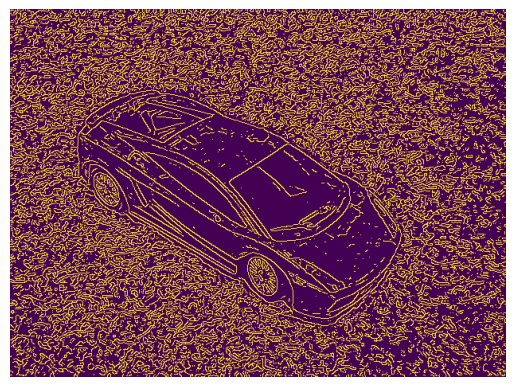

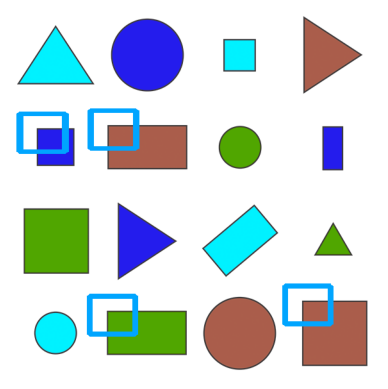

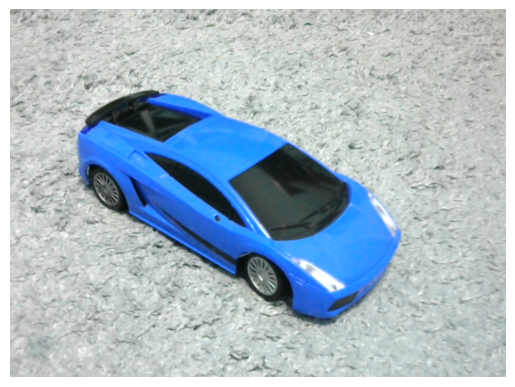

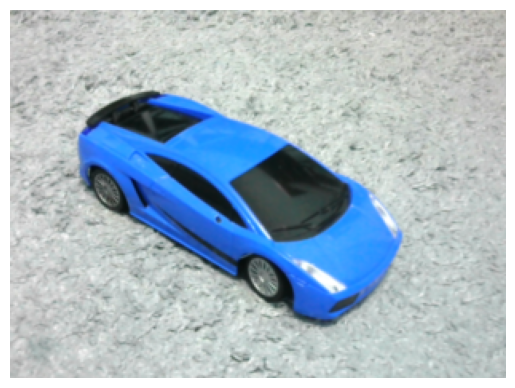

In [53]:
img = cv2.imread("lambo.png")
template_img = cv2.imread("shapes_template.jpg")
shapes_img = cv2.imread("shapes-1.png")

os.makedirs("images/", exist_ok=True)

sobel_img = sobel_edge_detection(img)
cv2.imwrite("images/sobel.png", sobel_img)
show_img(sobel_img)

canny_img = canny_edge_detection(img, 50, 50)
cv2.imwrite("images/canny.png", canny_img)
show_img(canny_img)

template_match_img = template_match(shapes_img, template_img)
cv2.imwrite("images/template_match.png", template_match_img)
show_img(template_match_img)

size_up_img = resize(img, scale_factor=2, up_or_down="up")
size_down_img = resize(img, scale_factor=2, up_or_down="down")
cv2.imwrite("images/size_up.png", size_up_img)
cv2.imwrite("images/size_down.png", size_down_img)
show_img(size_up_img)
show_img(size_down_img)